In [1]:
import os
import pandas as pd

In [2]:
data_path = os.path.join("data","airbnb.csv")
airbnb_raw = pd.read_csv(data_path)

In [3]:
airbnb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
neighbourhood_group               13321 non-null object
neighbourhood                     13321 non-null object
latitude                          13321 non-null float64
longitude                         13321 non-null float64
room_type                         13321 non-null object
price                             13321 non-null int64
minimum_nights                    13321 non-null int64
number_of_reviews                 13321 non-null int64
reviews_per_month                 13321 non-null float64
calculated_host_listings_count    13321 non-null int64
availability_365                  13321 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


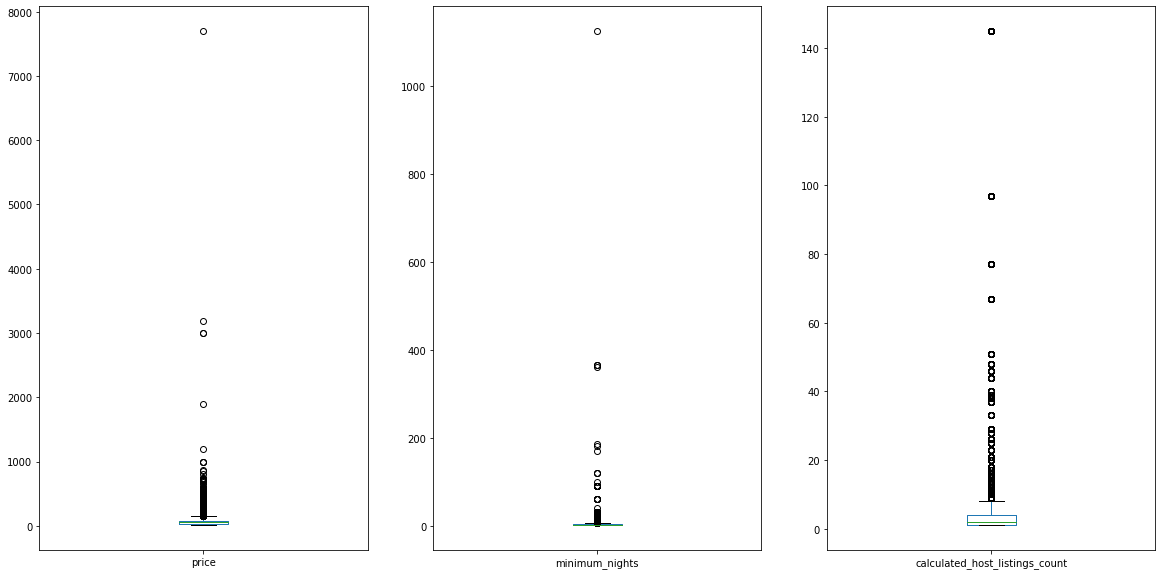

In [4]:
import matplotlib.pyplot as plt

# DF donde descartaremos los outliers.
airbnb_staged = airbnb_raw

num_airbnb = airbnb_raw[['price', 'minimum_nights', 'calculated_host_listings_count']]
num_airbnb.plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

En el box and whiskers vemos que hay varios varios outliers. Vamos a eliminar estos registros para que no nos afecten a la hora de entrenar el modelo.

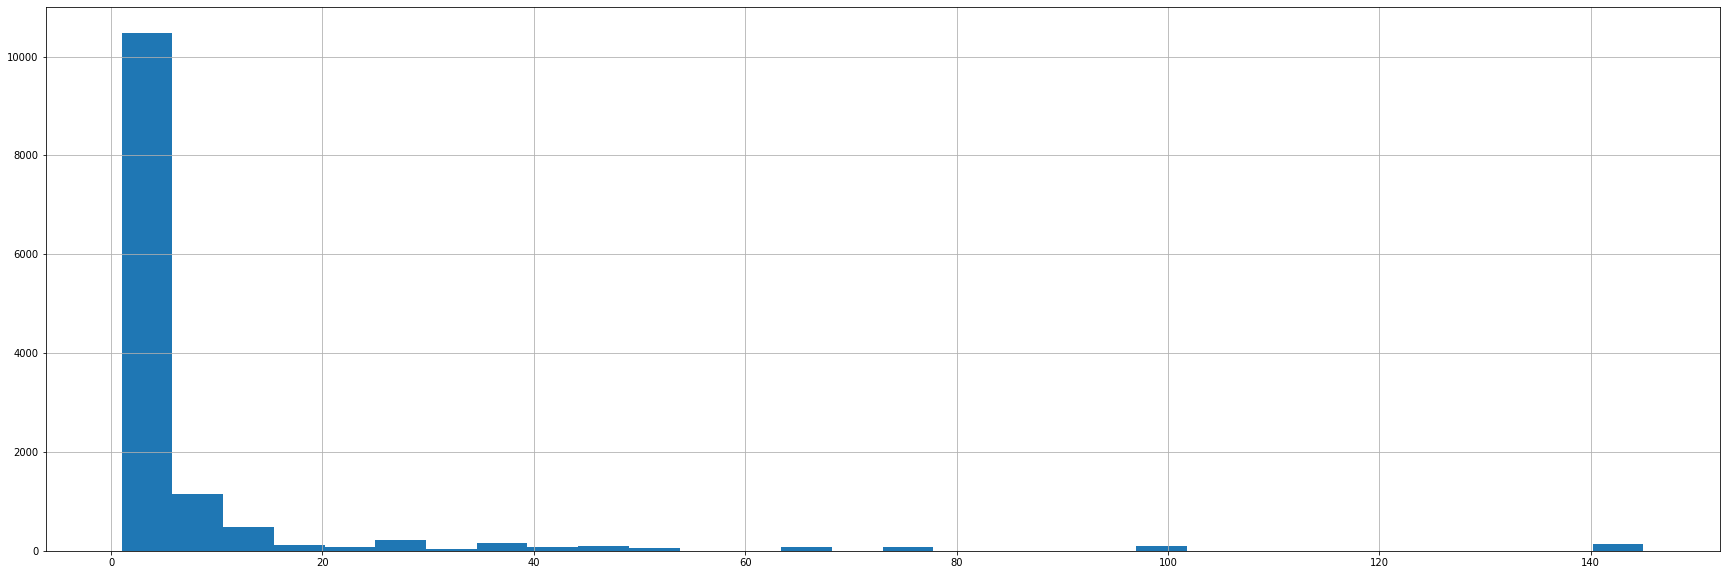

In [5]:
num_airbnb['calculated_host_listings_count'].hist(bins=30, figsize=(30,10))
plt.show()

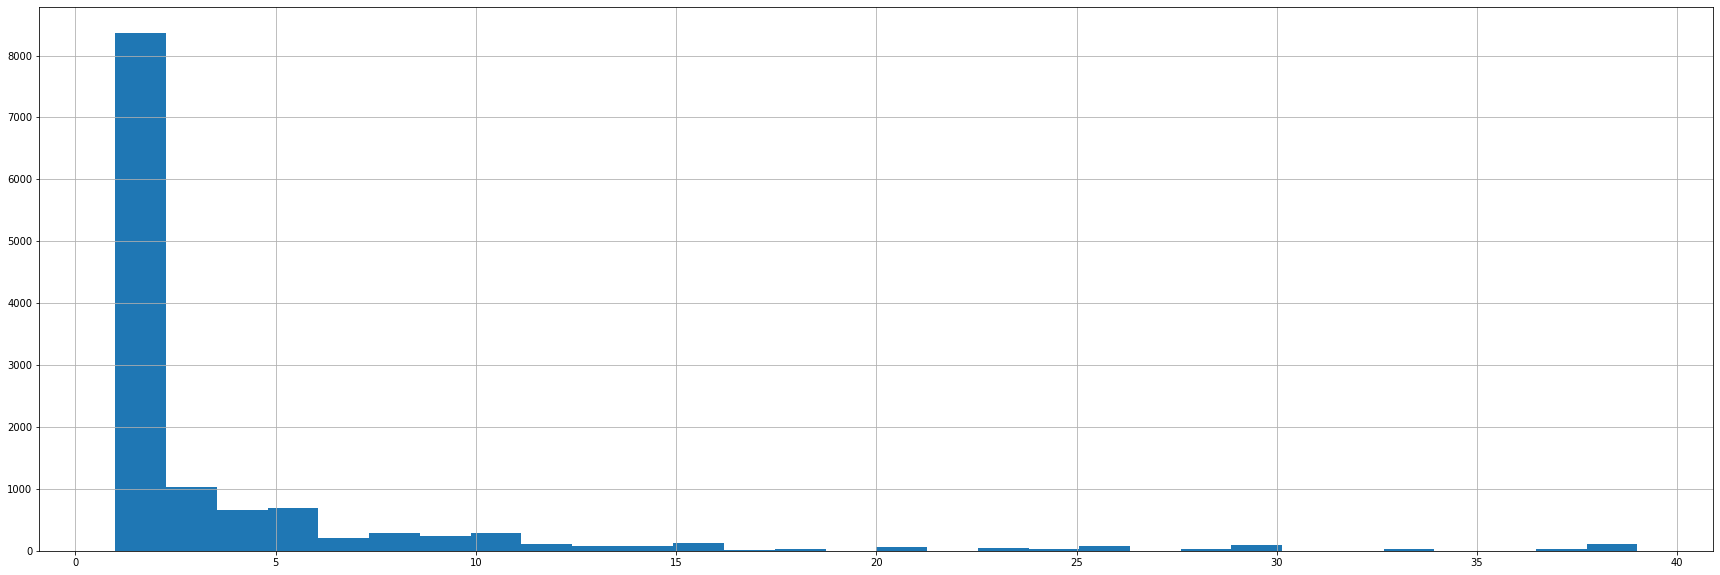

In [6]:
listings_airbnb = num_airbnb['calculated_host_listings_count']
listings_airbnb[listings_airbnb < 40].hist(bins=30, figsize=(30,10))

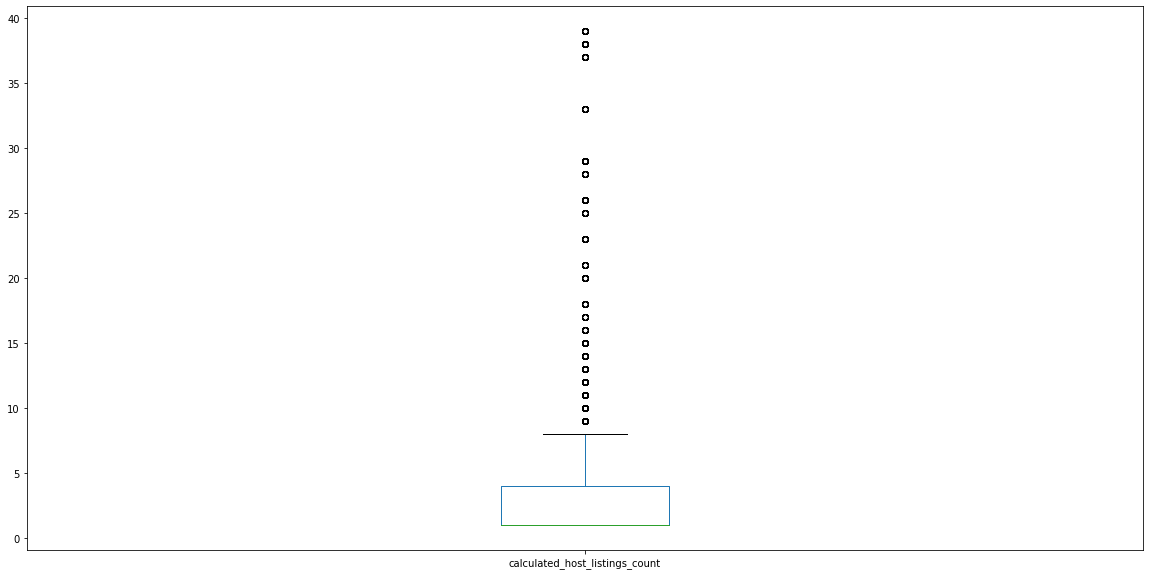

In [7]:
listings_airbnb[listings_airbnb < 40].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

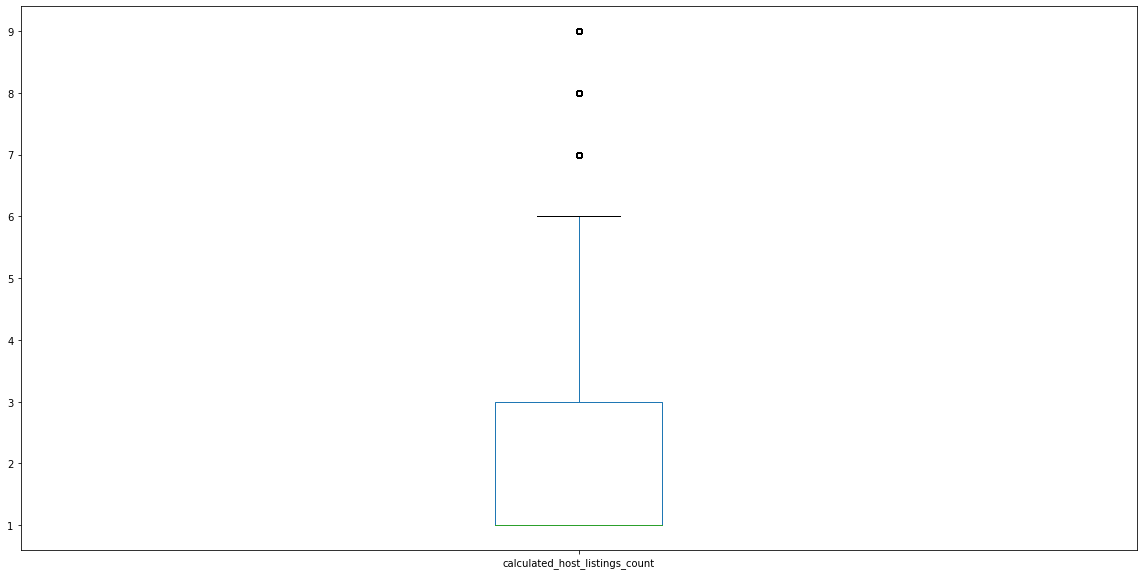

In [8]:
listings_airbnb[listings_airbnb < 10].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

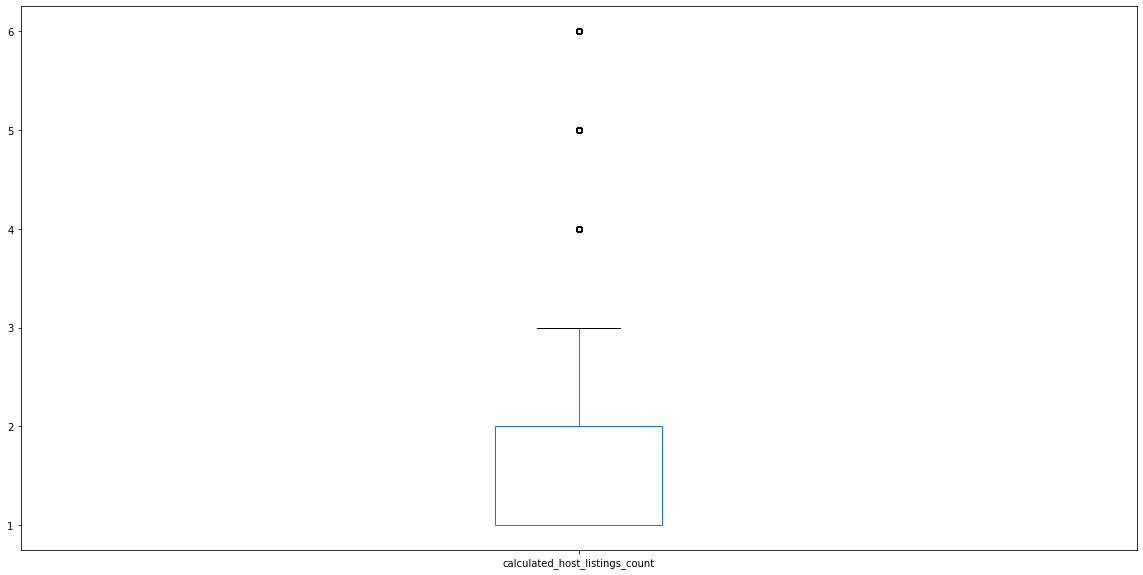

In [9]:
listings_airbnb[listings_airbnb < 6.5].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

In [10]:
airbnb_staged = airbnb_staged[airbnb_staged['calculated_host_listings_count'] < 6.5]

descartamos los registros por encima de 6.5

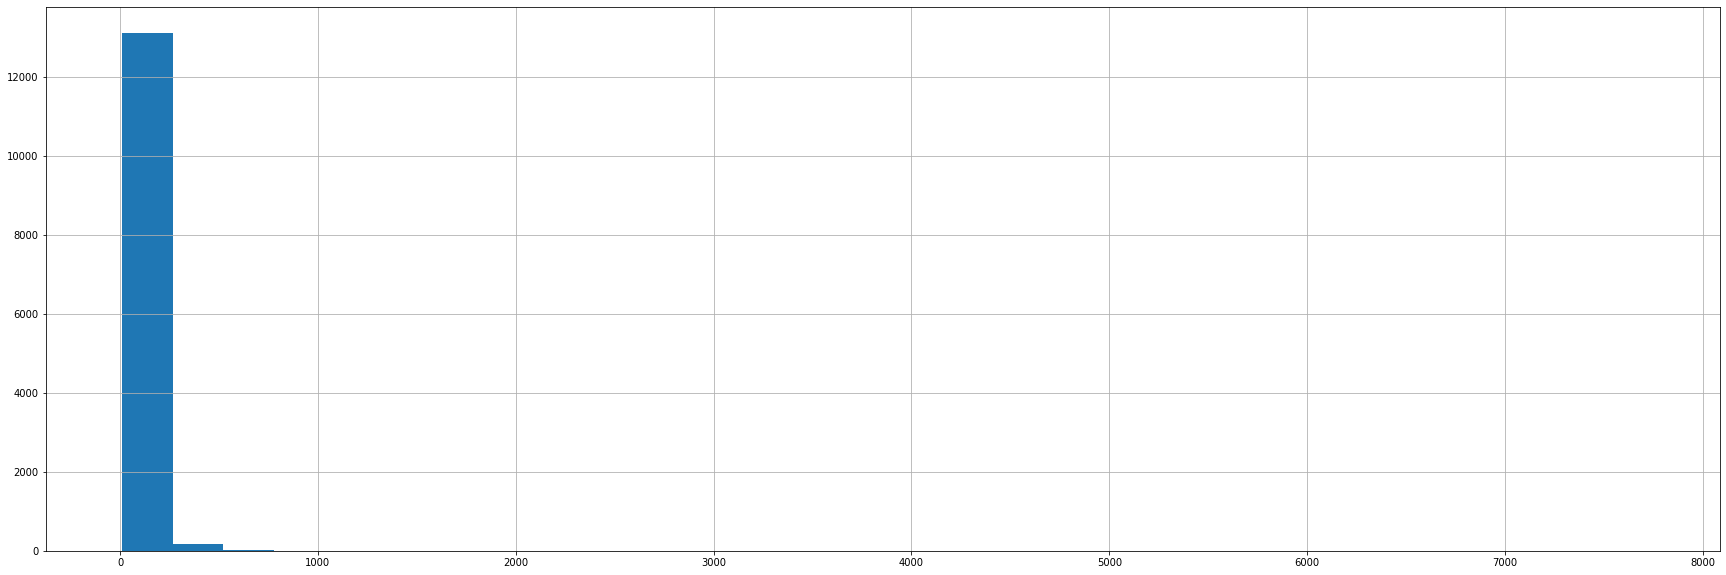

In [11]:
num_airbnb['price'].hist(bins=30, figsize=(30,10))
plt.show()

Vamos a eliminar los registros con price > 1000 y volvemos a dibujar el histograma a ver la distribución.

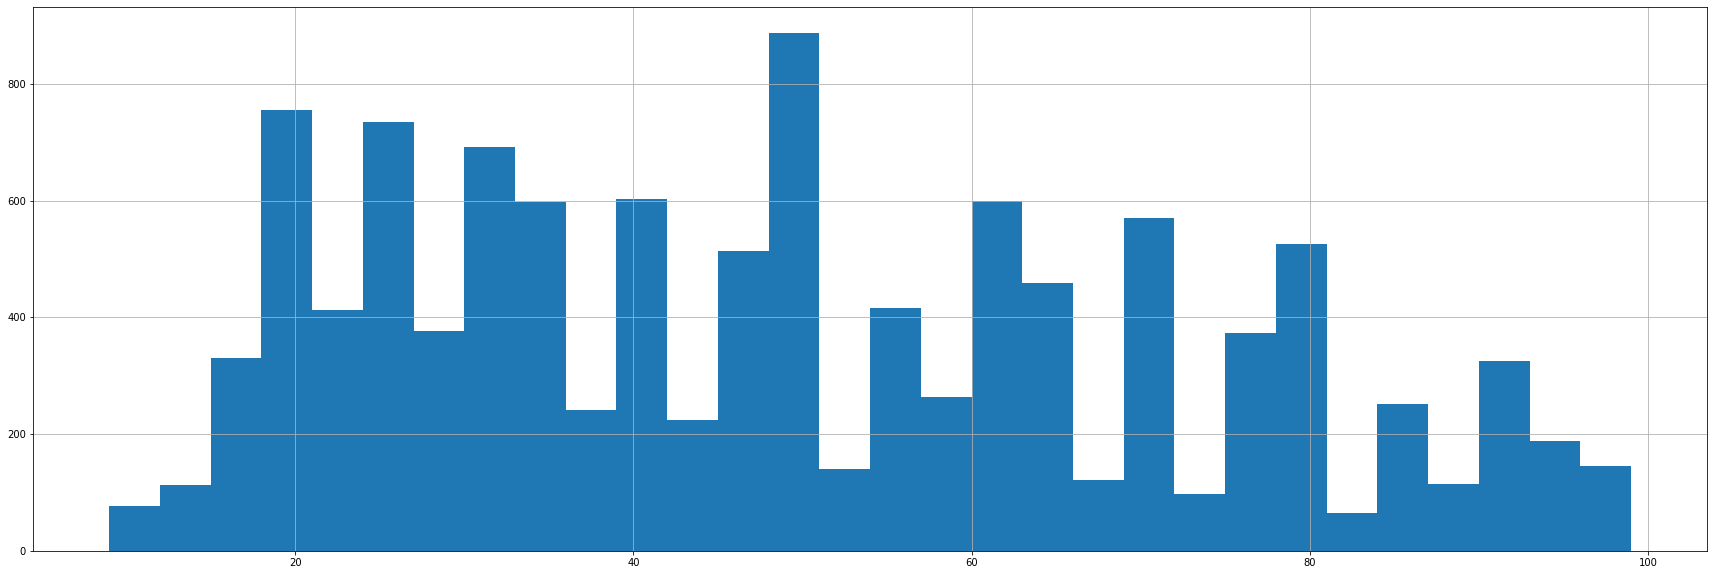

In [12]:
price_airbnb = num_airbnb['price']
price_airbnb[price_airbnb < 100].hist(bins=30, figsize=(30,10))
plt.show()

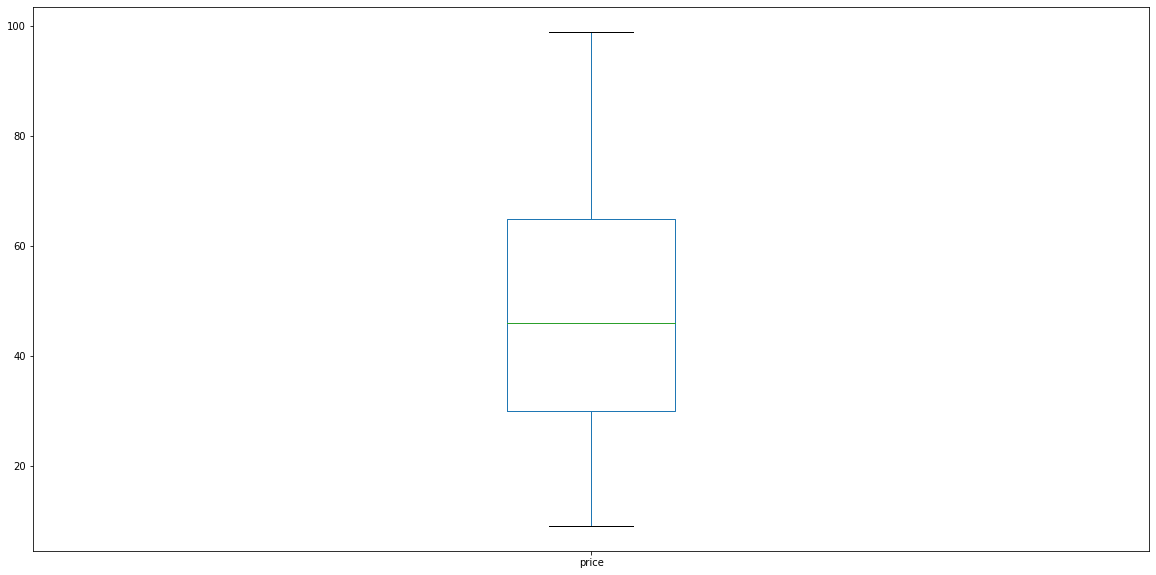

In [13]:
price_airbnb = num_airbnb['price']
price_airbnb[price_airbnb < 100].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))
plt.show()

In [14]:
airbnb_staged = airbnb_staged[airbnb_staged['price'] < 101]

No parece que haya mas outliers. No hay price > 100

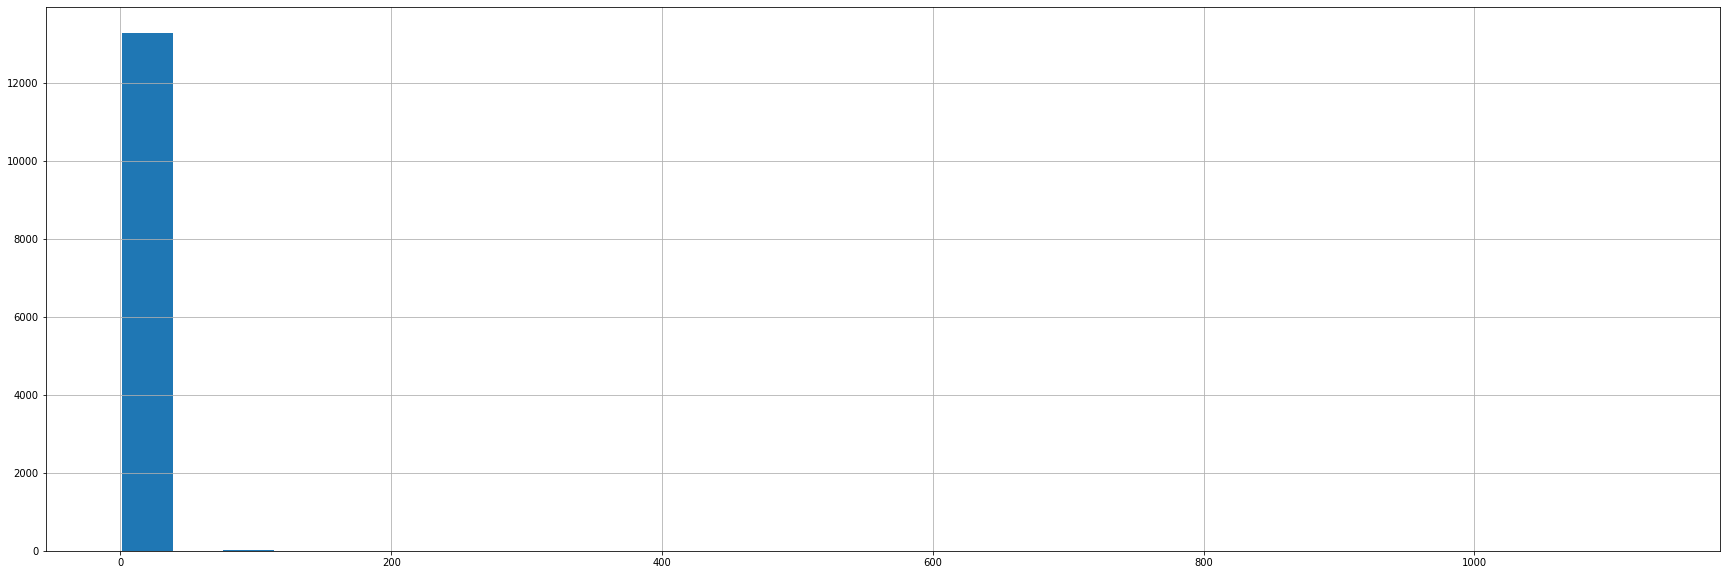

In [15]:
num_airbnb['minimum_nights'].hist(bins=30, figsize=(30,10))
plt.show()

Descartamos minimum_nights > 200 y volvemos a dibujar:

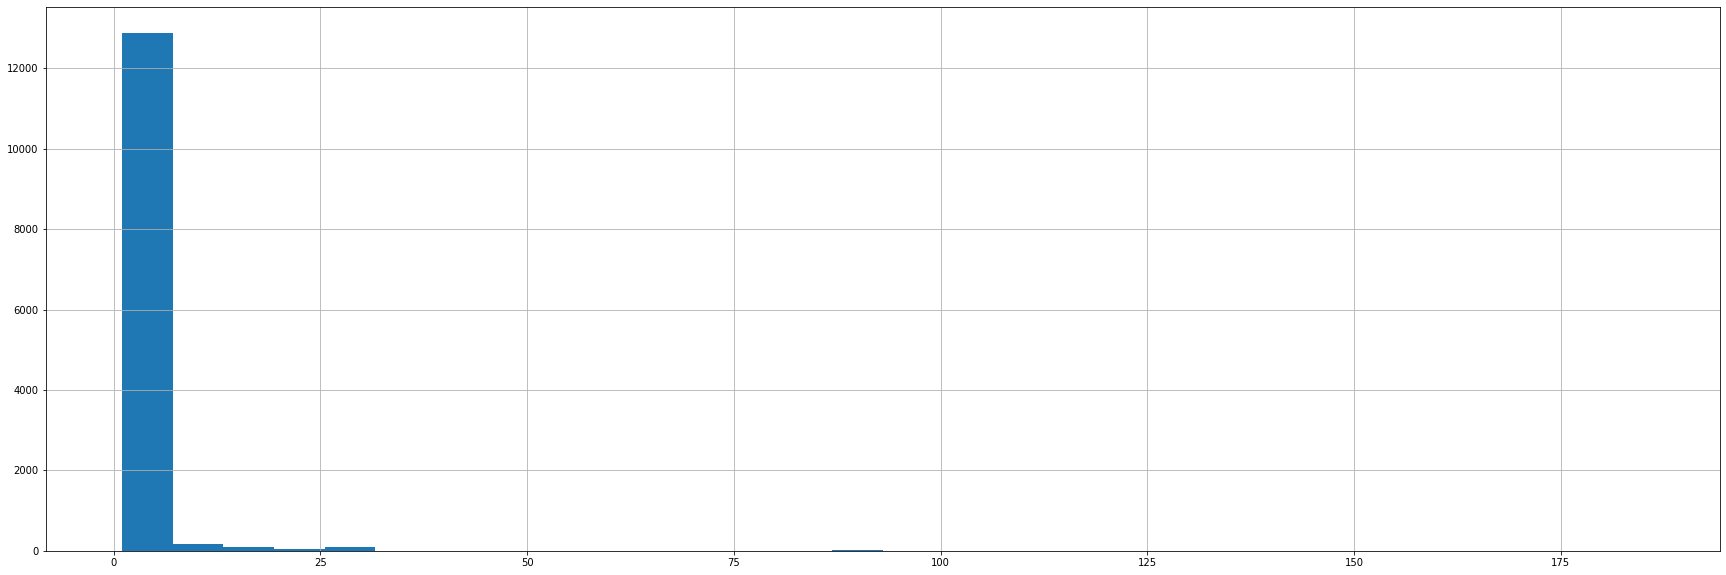

In [16]:
min_nights_airbnb = num_airbnb['minimum_nights']
min_nights_airbnb[min_nights_airbnb < 200].hist(bins=30, figsize=(30,10))
plt.show()

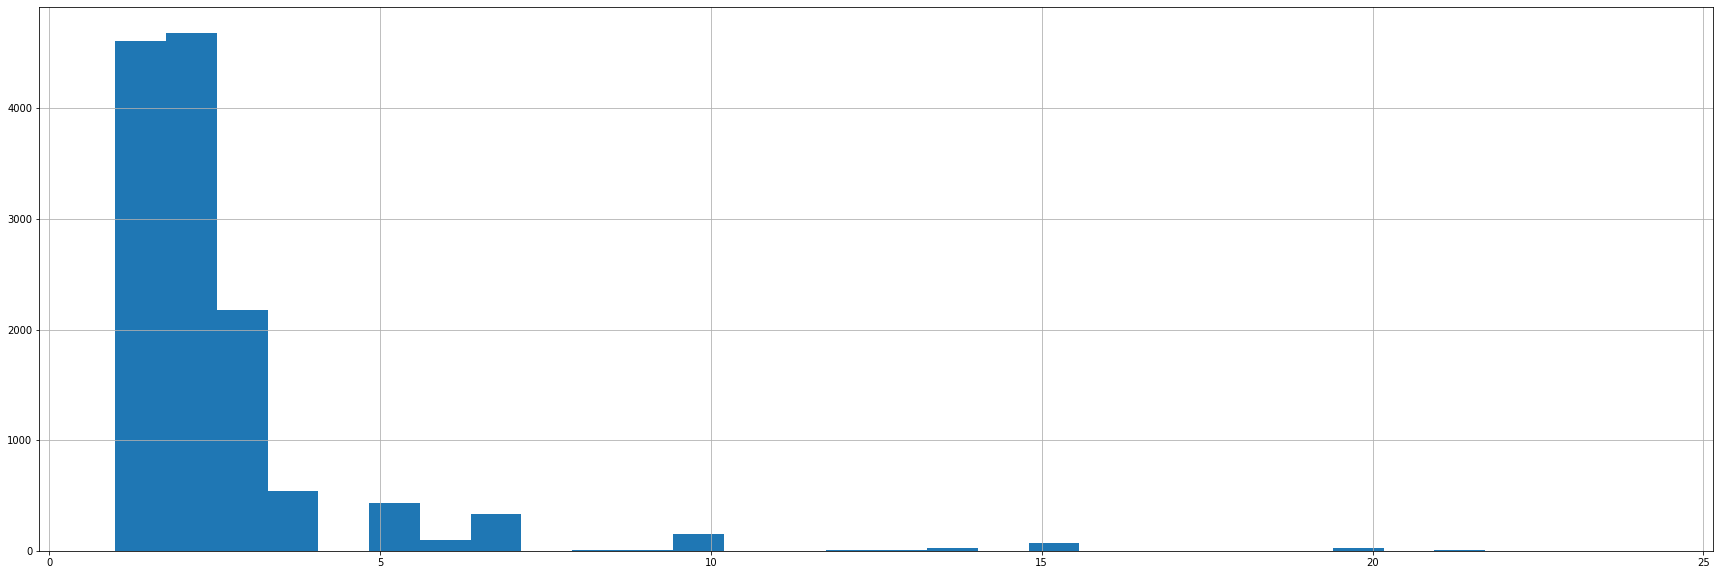

In [17]:
min_nights_airbnb = num_airbnb['minimum_nights']
min_nights_airbnb[min_nights_airbnb < 25].hist(bins=30, figsize=(30,10))
plt.show()

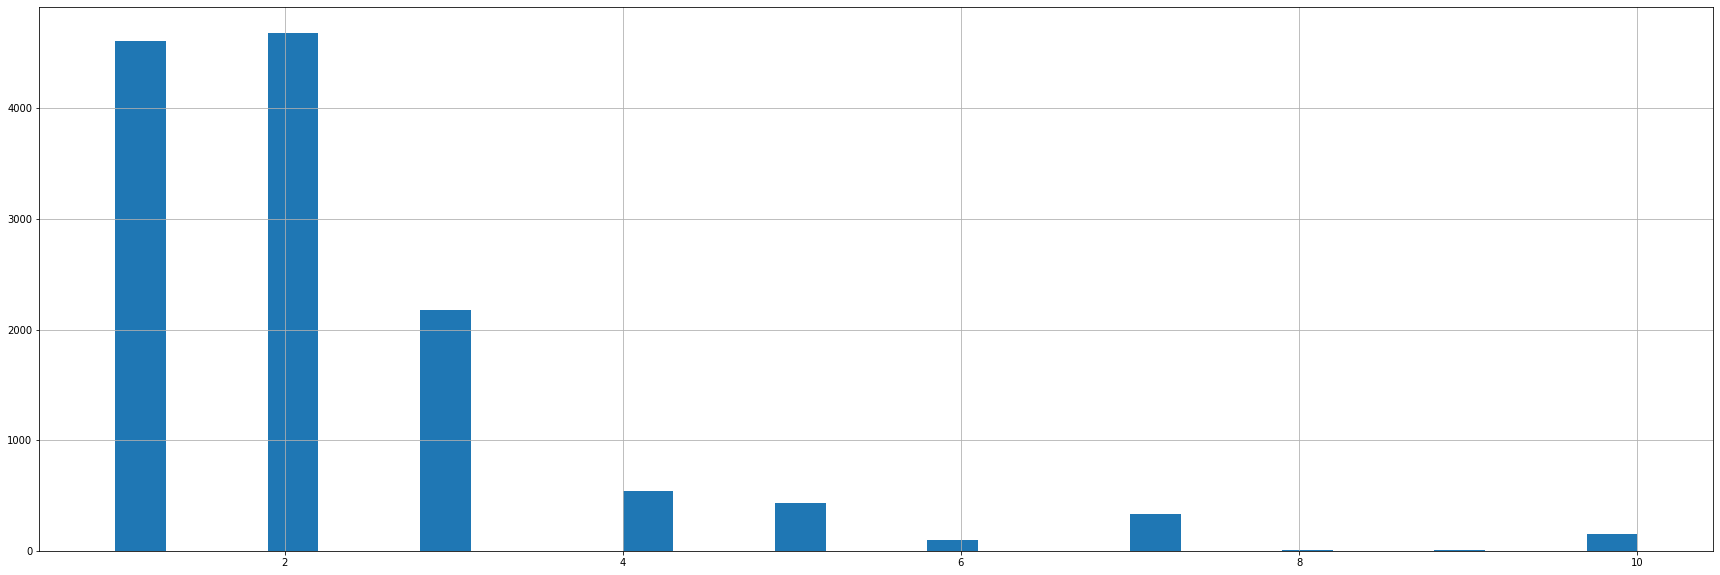

In [18]:
min_nights_airbnb = num_airbnb['minimum_nights']
min_nights_airbnb[min_nights_airbnb < 11].hist(bins=30, figsize=(30,10))
plt.show()

minimum_nights    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

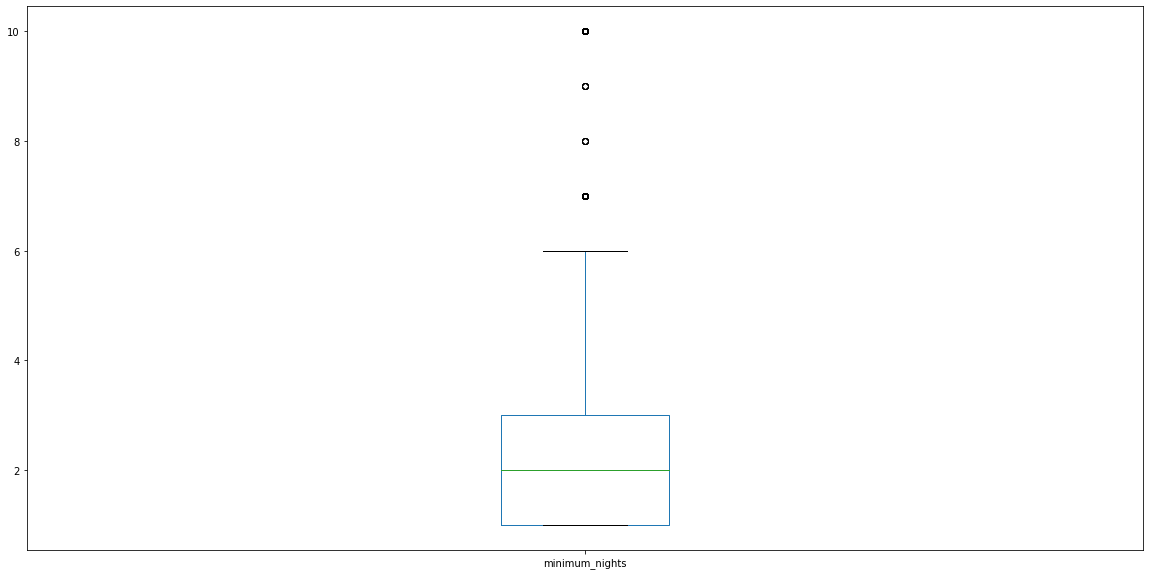

In [19]:
min_nights_airbnb[min_nights_airbnb < 11].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))

minimum_nights    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

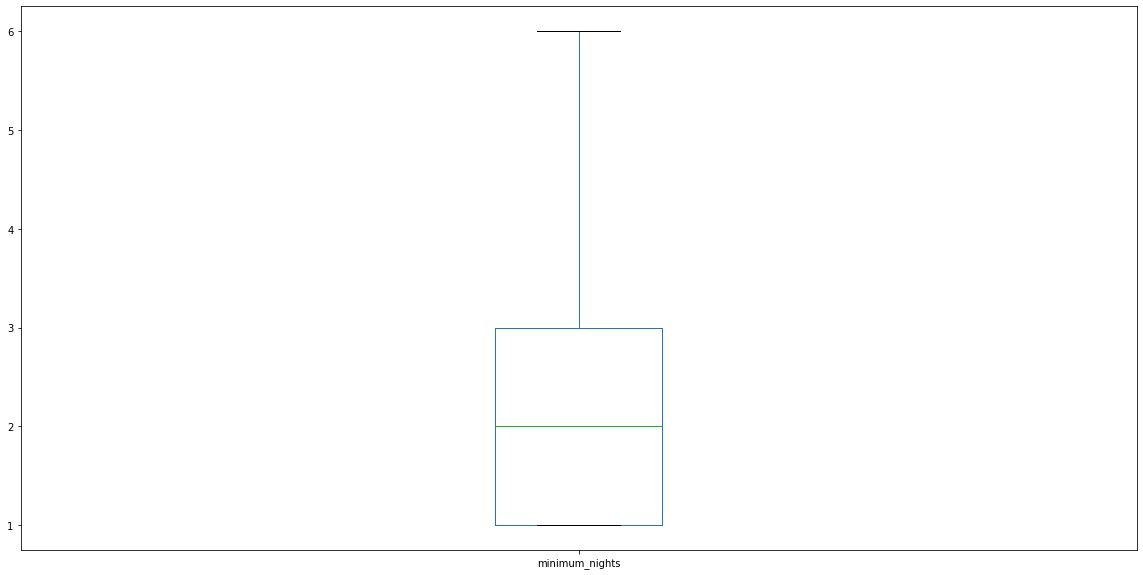

In [20]:
min_nights_airbnb[min_nights_airbnb < 7].plot(kind="box", subplots=True, sharex=False, sharey=False,figsize=(20,10))

In [21]:
airbnb_staged = airbnb_staged[airbnb_staged['minimum_nights'] < 7]

Descartamos todo por encima de 7.

In [22]:
airbnb_staged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9117 entries, 1 to 13320
Data columns (total 11 columns):
neighbourhood_group               9117 non-null object
neighbourhood                     9117 non-null object
latitude                          9117 non-null float64
longitude                         9117 non-null float64
room_type                         9117 non-null object
price                             9117 non-null int64
minimum_nights                    9117 non-null int64
number_of_reviews                 9117 non-null int64
reviews_per_month                 9117 non-null float64
calculated_host_listings_count    9117 non-null int64
availability_365                  9117 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 854.7+ KB


In [23]:
# Actualizamos el index:
airbnb_staged = airbnb_staged.reset_index(drop=True)
airbnb_staged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 11 columns):
neighbourhood_group               9117 non-null object
neighbourhood                     9117 non-null object
latitude                          9117 non-null float64
longitude                         9117 non-null float64
room_type                         9117 non-null object
price                             9117 non-null int64
minimum_nights                    9117 non-null int64
number_of_reviews                 9117 non-null int64
reviews_per_month                 9117 non-null float64
calculated_host_listings_count    9117 non-null int64
availability_365                  9117 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 783.6+ KB


## Separamos un train y un test set

In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
# Separamos en 2 grupos con 0.2 en el test set.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Separamos el test y train set respetando la proporción de muestras por neighbourhood_group para tener representación 
# de todas las zonas en ambos conjuntos.
for train_id, test_id in split.split(airbnb_staged, airbnb_staged["neighbourhood_group"]):
    train_set_st, test_set_st = airbnb_staged.loc[train_id], airbnb_staged.loc[test_id]

y_train = train_set_st["price"]
x_train = train_set_st.drop("price", 1, inplace=False)

In [25]:
train_set_st.count()

neighbourhood_group               7293
neighbourhood                     7293
latitude                          7293
longitude                         7293
room_type                         7293
price                             7293
minimum_nights                    7293
number_of_reviews                 7293
reviews_per_month                 7293
calculated_host_listings_count    7293
availability_365                  7293
dtype: int64

In [26]:
test_set_st.count()

neighbourhood_group               1824
neighbourhood                     1824
latitude                          1824
longitude                         1824
room_type                         1824
price                             1824
minimum_nights                    1824
number_of_reviews                 1824
reviews_per_month                 1824
calculated_host_listings_count    1824
availability_365                  1824
dtype: int64

## Preprocesing

In [31]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR, SVR

label = ["price"]
cat_attribs = ["neighbourhood_group", "neighbourhood", "room_type"]
cat_attribs_no_neighbour = ["neighbourhood_group", "room_type"]
num_attribs = ["latitude","longitude","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count","availability_365"]


neighbour_col_trs = ColumnTransformer([
    ("num_scaler", StandardScaler(), num_attribs),
    ("cat_ordinal", OneHotEncoder(), cat_attribs)
])

no_neighbour_col_trs = ColumnTransformer([
    ("num_scaler", StandardScaler(), num_attribs),
    ("cat_ordinal", OneHotEncoder(), cat_attribs_no_neighbour)
])

neighbour_linear_reg = Pipeline([
    ("col_trans", neighbour_col_trs),
    ("model", LinearSVR())
])

neighbour_reg = Pipeline([
    ("col_trans", neighbour_col_trs),
    ("model", SVR())
])

no_neighbour_linear_reg = Pipeline([
    ("col_trans", no_neighbour_col_trs),
    ("model", LinearSVR())
])

no_neighbour_reg = Pipeline([
    ("col_trans", no_neighbour_col_trs),
    ("model", SVR())
])

#### Sin neighbourhood

In [28]:
from sklearn.model_selection import cross_val_score

no_neighbour_linear_svm_scores = cross_val_score(no_neighbour_linear_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
no_neighbour_linear_svm_scores.min()
# -294.2032897105128

-294.54388098254964

In [29]:
no_neighbour_svm_scores = cross_val_score(no_neighbour_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
no_neighbour_svm_scores.min()
# -307.1842825636162

-307.1842825636162

#### Con neighbourhood

In [33]:
neighbour_linear_svm_scores = cross_val_score(neighbour_linear_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
neighbour_linear_svm_scores.min()
# 

ValueError: Found unknown categories ['Orcasitas'] in column 1 during transform

In [ ]:
neighbour_reg_svm_scores = cross_val_score(neighbour_reg, x_train, y_train, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)
neighbour_reg_svm_scores.min()
# 